In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('/content/drive/MyDrive/diabetes2.csv')

# Exploratory Data Analysis (EDA)¶
Display the first five rows of the DataFrame to understand the variables

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Explore information about the structure, data types, and memory usage of the DataFrame.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.shape

(768, 9)

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Create a histogram of the age variable

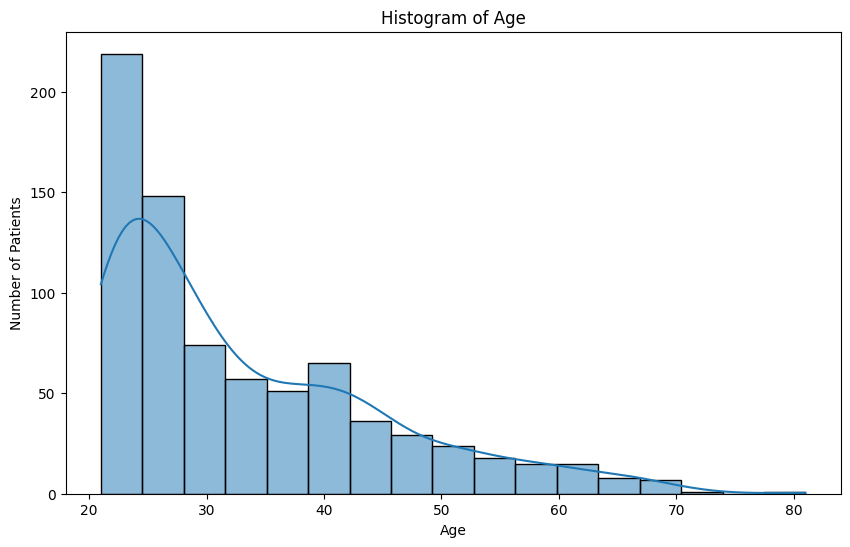

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['Age'], kde=True)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

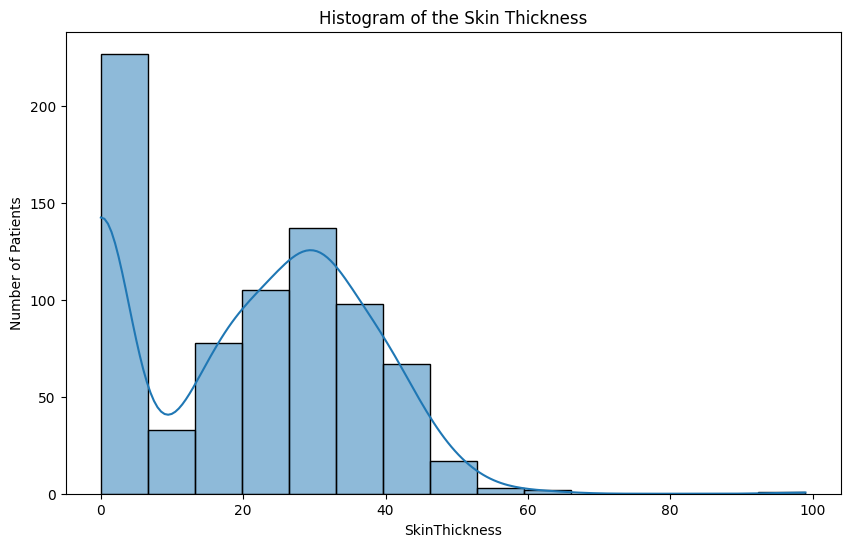

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SkinThickness'], kde=True)

plt.title('Histogram of the Skin Thickness')
plt.xlabel('SkinThickness')
plt.ylabel('Number of Patients')

plt.show()

### Create a heatmap of the correlation matrix to compute the correlation coefficients between all pairs of variables in the DataFrame

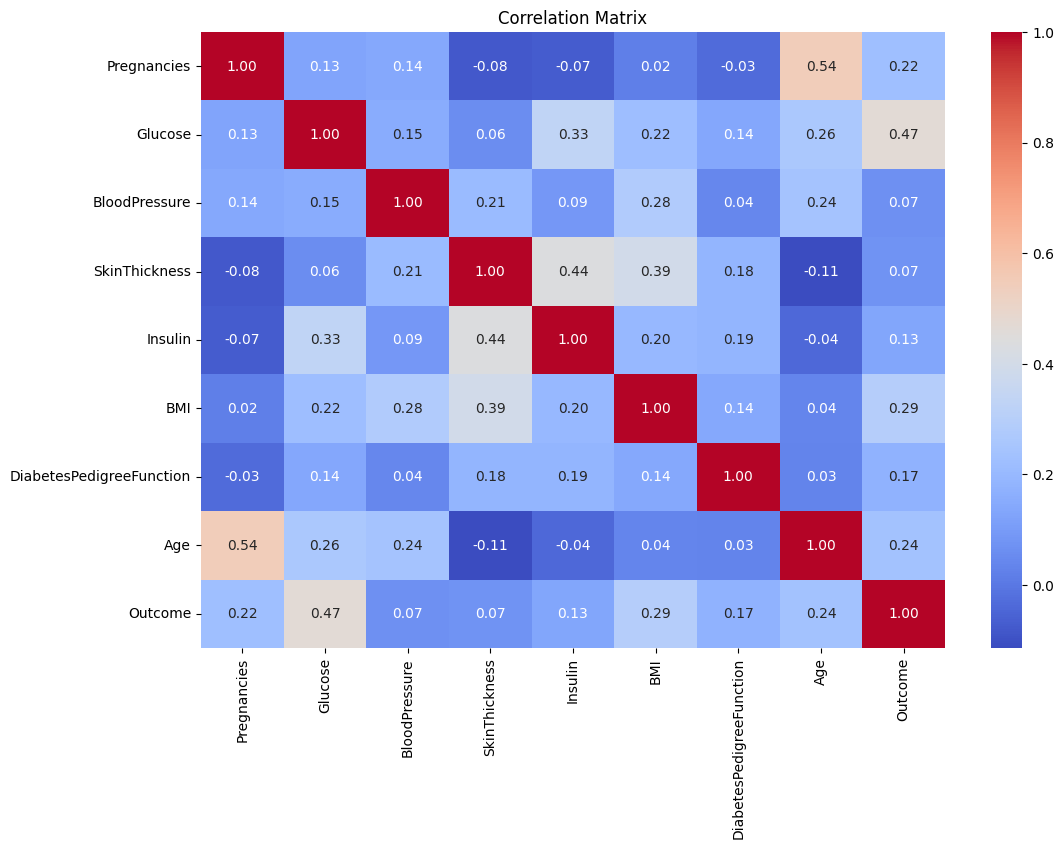

In [12]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

### check if there are any missing values in the DataFrame

In [13]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Data Preparation¶
Handle outliers using the mean. We calculate the lower and upper bounds based on the interquartile range (IQR) and replaces any values outside this range with the mean of the respective column.
Note: We compute for each variable:

Q1: The first quantile (25%)
Q3: The third quantile (75%)
IQR=Q3−Q1
The lowerbound=Q1−1.5∗IQR
The upperbound=Q3+1.5∗IQR
After that, we replace the outliers by lower and upper bounds

In [14]:
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])

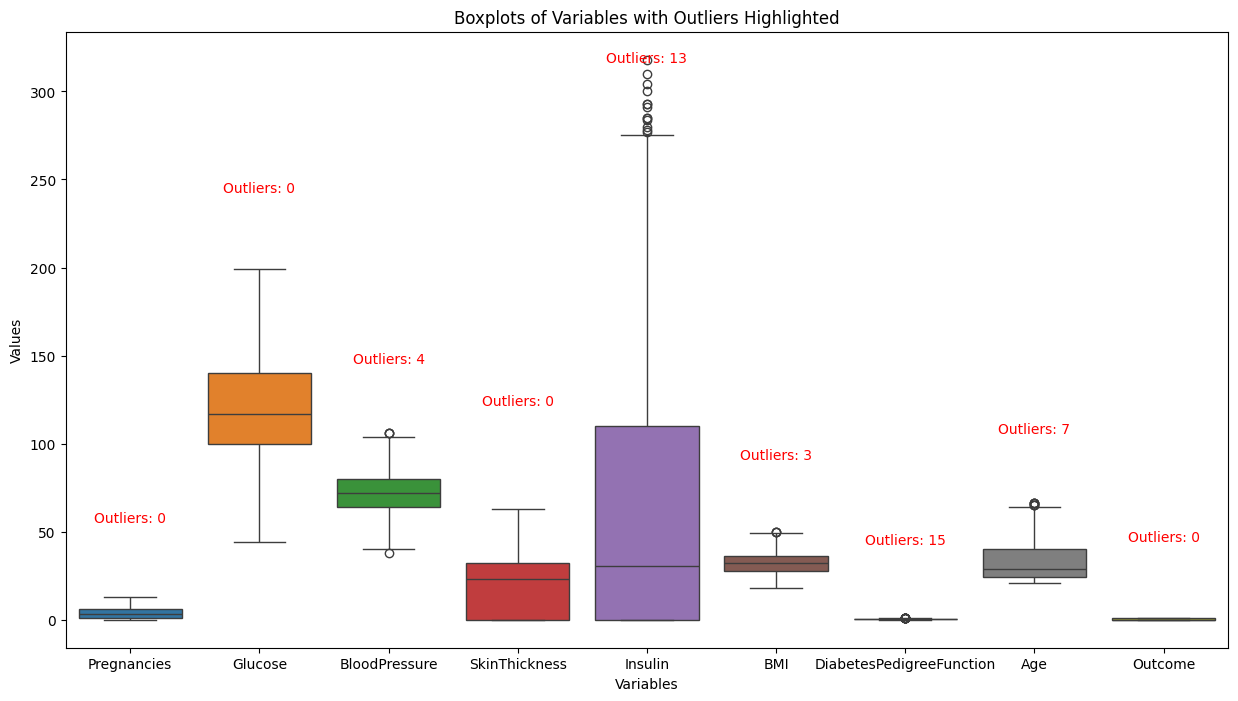

In [15]:
# Calculate the lower and upper bounds for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data < lower_bound) | (data > upper_bound))

# Set the figure size
plt.figure(figsize=(15, 8))

# Create boxplots
sns.boxplot(data=data)

# Add title and labels
plt.title('Boxplots of Variables with Outliers Highlighted')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the number of outliers for each column above the boxplots
for col in data.columns:
    num_outliers = outliers[col].sum()
    plt.text(data.columns.get_loc(col), upper_bound[col] + 0.1 * (upper_bound.max() - lower_bound.min()),
             f'Outliers: {num_outliers}', ha='center', va='center', color='red')

# Show the plot
plt.show()

## Split the de data in to parts or sets; features and target.

Target is the column Outcome
Features are all the columns except the target

In [16]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

show the number of observations for each class (1 and 0) in the 'Outcome' column

In [17]:
print(f"Unique values in 'Outcome' column: {y.unique()}")
print(f"Number of unique values in 'Outcome' column: {y.nunique()}")
print(f'Count the number of observations for each class \n: {y.value_counts()}')

Unique values in 'Outcome' column: [1. 0.]
Number of unique values in 'Outcome' column: 2
Count the number of observations for each class 
: Outcome
0.0    500
1.0    268
Name: count, dtype: int64


visualize the distribution of unique values in the 'Outcome' column, which contains binary values (1 and 0)

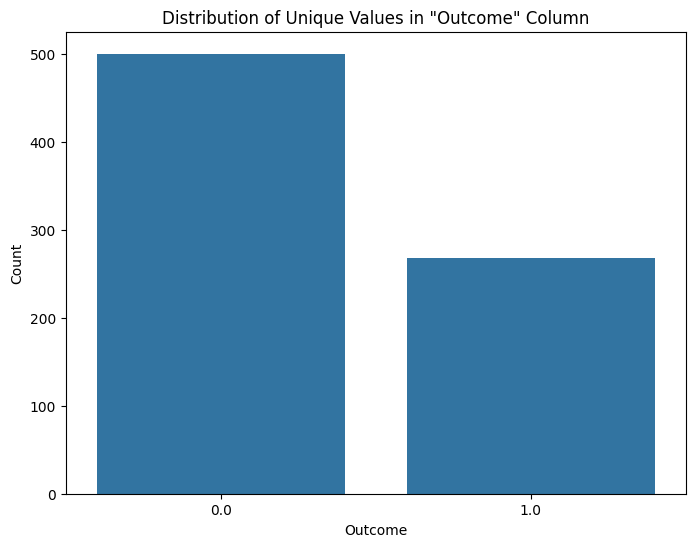

In [18]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Unique Values in "Outcome" Column')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Outcome'>

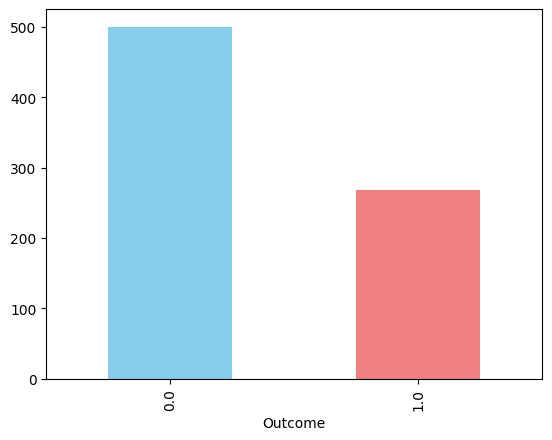

In [19]:
y.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])

From the statistics describtion of the data (data.discribe()), we can see the columns must be scaled

Normalizing numeric variables with StandardScaler

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Show the Normalisation result

In [21]:
X_df = pd.DataFrame(X, columns=data.columns[:-1])
X_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.434038e-16,-1.595946e-16,4.255855e-16,1.272131e-17,-7.864080e-17,2.151057e-16,-8.789266e-17,2.266705e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.158789e+00,-2.553955e+00,-3.048148e+00,-1.302538e+00,-8.153544e-01,-2.185127e+00,-1.443178e+00,-1.069690e+00
25%,-8.527940e-01,-7.210503e-01,-7.190618e-01,-1.302538e+00,-8.153544e-01,-7.334514e-01,-7.663432e-01,-7.979675e-01
50%,-2.408039e-01,-1.539182e-01,-2.419844e-03,1.635453e-01,-4.212562e-01,-3.102758e-02,-2.405970e-01,-3.450974e-01
75%,6.771814e-01,6.104773e-01,7.142221e-01,7.372301e-01,6.059836e-01,6.401774e-01,6.159099e-01,6.512168e-01
max,2.819147e+00,2.542014e+00,3.043308e+00,2.713255e+00,3.293605e+00,2.778668e+00,3.101720e+00,3.006141e+00


# Modelling¶
In this modelling phase we use:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display the shape of the splited sets: X_train, X_test, y_train, y_test

In [23]:
print(f'The shape of training features is: {X_train.shape}')
print(f'The shape of training target is: {y_train.shape}')

print(f'The shape of testing features is: {X_test.shape}')
print(f'The shape of testing target is: {y_test.shape}')

The shape of training features is: (614, 8)
The shape of training target is: (614,)
The shape of testing features is: (154, 8)
The shape of testing target is: (154,)


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Initialize the Random Forest classifier with specific hyperparameters
clf = RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=4, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred)

# Calculation of recall
recall = recall_score(y_test, y_pred)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

# Stacking Ensemble

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes2.csv')

# Inspect the dataset to understand its structure (optional)
# print(df.head())

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train two Random Forest classifiers
model_1 = RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=4, random_state=43)
model_1.fit(X_train, y_train)

model_2 = RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=4, random_state=43)
model_2.fit(X_train, y_train)

# Predict with both models
predictions_1 = model_1.predict(X_test)
predictions_2 = model_2.predict(X_test)

# Combine the predictions using majority voting
combined_predictions = mode(np.column_stack((predictions_1, predictions_2)), axis=1)[0].flatten()

# Evaluate the model
accuracy = accuracy_score(y_test, combined_predictions)

print("Accuracy:", accuracy)

# Calculation of accuracy
accuracy = accuracy_score(y_test, combined_predictions)

# Calculation of precision
precision = precision_score(y_test, combined_predictions)

# Calculation of recall
recall = recall_score(y_test, combined_predictions)

# Calculation of F1 score
f1 = f1_score(y_test, combined_predictions)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


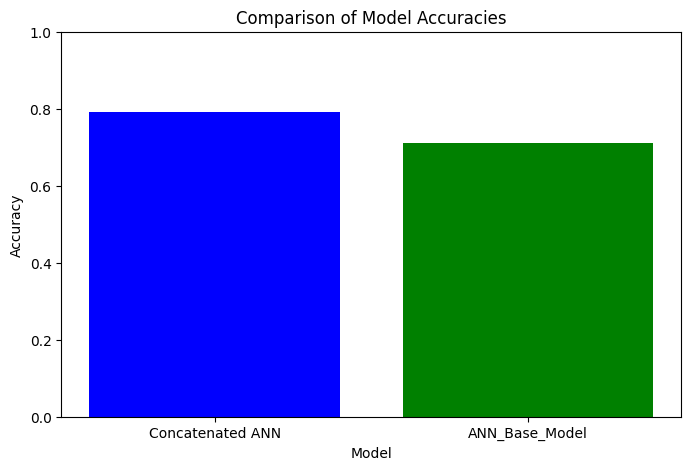

In [27]:
import matplotlib.pyplot as plt

# Let's assume these are the accuracies
accuracy_concatenated_ANN = 0.79
accuracy_other_model = 0.71

# Defining labels and values
models = ['Concatenated ANN', 'ANN_Base_Model']
accuracies = [accuracy_concatenated_ANN, accuracy_other_model]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy values range from 0 to 1
plt.show()

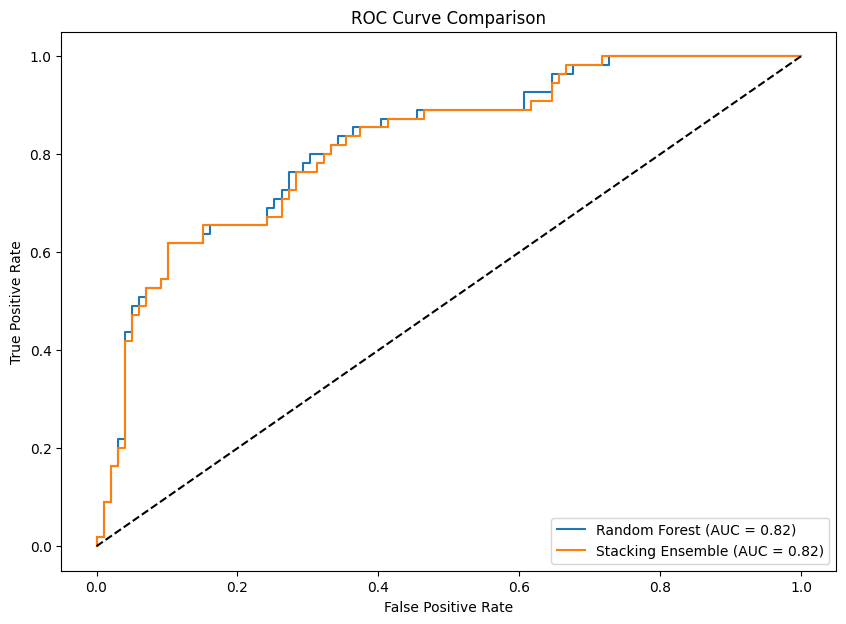

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes2.csv')
X = df.drop(columns=[df.columns[-1]])  # Assuming the last column is the target
y = df[df.columns[-1]]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=4, random_state=42)
rf_model.fit(X_train, y_train)

# Define and fit the Stacking model
stacking_model = StackingClassifier(
    estimators=[
        ('rf1', RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=4,random_state=42)),
        ('rf2', RandomForestClassifier(n_estimators=7000, max_depth=2, min_samples_split=4,random_state=43))
    ],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)

# Predict probabilities for the test set
rf_probs = rf_model.predict_proba(X_test)[:, 1]
stacking_probs = stacking_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
stacking_fpr, stacking_tpr, _ = roc_curve(y_test, stacking_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})')
plt.plot(stacking_fpr, stacking_tpr, label=f'Stacking Ensemble (AUC = {auc(stacking_fpr, stacking_tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()